In [1]:
# 导入工具包
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#导入数据集
df = pd.read_csv("dataset/games.csv")

In [2]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


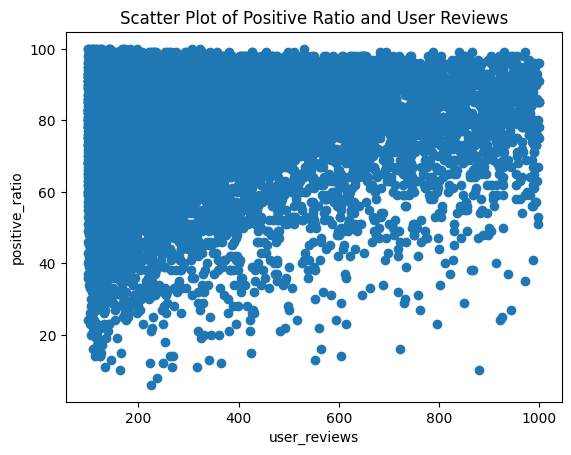

The correlation coefficient between positive ratio and user reviews is 0.08


In [18]:
X = 'user_reviews'
Y = 'positive_ratio'

# # 计算user_reviews字段的75%分位数
# q1 = df["user_reviews"].quantile(0.75)

# # 计算user_reviews字段的25%分位数
# q2 = df["user_reviews"].quantile(0.25)

# 过滤
df = df[df["user_reviews"] <= 5000]
df = df[df["user_reviews"] >= 100]

# 随机抽样20条数据，固定随机数种子为0
sample = df.sample(n=20, random_state=20)

# 提取positive_ratio和user_reviews两个字段
x = sample[X]
y = sample[Y]

# 绘制散点图
plt.scatter(x, y)
plt.xlabel(X)
plt.ylabel(Y)
plt.title("Scatter Plot of Positive Ratio and User Reviews")
plt.show()

# 计算并打印两个字段的相关系数
corr = np.corrcoef(x, y)[0, 1]
print(f"The correlation coefficient between positive ratio and user reviews is {corr:.2f}")

The regression equation is y = 72.37 + 0.02 * x


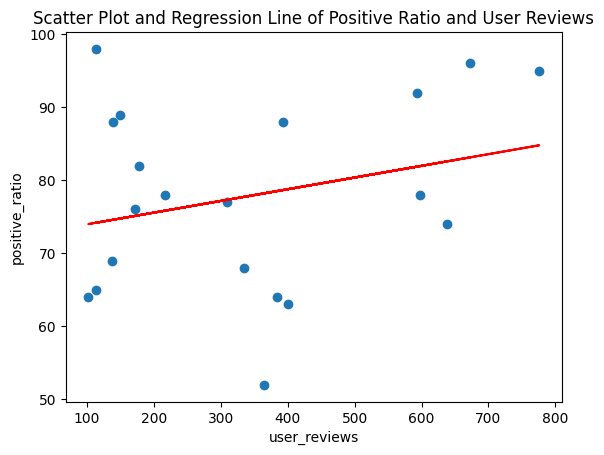

In [8]:
# 计算回归系数
beta_1 = np.cov(x, y)[0, 1] / np.var(x)
beta_0 = np.mean(y) - beta_1 * np.mean(x)

# 打印回归方程
print(f"The regression equation is y = {beta_0:.2f} + {beta_1:.2f} * x")

# 计算预测值
y_hat = beta_0 + beta_1 * x

# 绘制回归直线
plt.plot(x, y_hat, color="red")
plt.scatter(x, y)
plt.xlabel(X)
plt.ylabel(Y)
plt.title("Scatter Plot and Regression Line of Positive Ratio and User Reviews")
plt.show()

In [17]:
# 导入numpy和scipy库
import numpy as np
from scipy import stats

# 定义x和y数据
x = np.array([672, 384, 334, 598, 400, 638, 365, 393, 172, 102,139, 776, 113, 138, 178, 217, 594, 149, 310, 114])
y = np.array([96, 64, 68, 78, 63, 74, 52, 88, 76, 64,88, 95, 98, 69, 82, 78, 92, 89, 77, 65])

# 计算x和y的线性回归参数
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# 打印结果
print("斜率:", slope)
print("截距:", intercept)
print("相关系数:", r_value)
print("p值:", p_value)
print("标准误差:", std_err)


斜率: 0.015203867710996698
截距: 72.64132768565882
相关系数: 0.2512837472526573
p值: 0.28521268065118666
标准误差: 0.013803523593827895
